In [1]:
# Dataset = https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction/data

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

C:\Users\halzi\AppData\Local\Temp\ipykernel_15892\607542365.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# DATA EXPLORATION

In [2]:
df = pd.read_csv('restaurants_revenue.csv')
df.head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763


In [3]:
df.isna().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [4]:
df.Cuisine_Type.value_counts()

Cuisine_Type
Japanese    262
American    256
Mexican     250
Italian     232
Name: count, dtype: int64

## visualisasi

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Monthly_Revenue', ylabel='Count'>

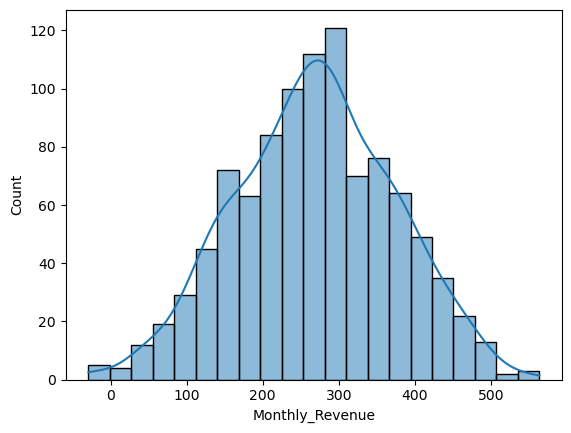

In [6]:
sns.histplot(data = df, x = 'Monthly_Revenue', kde = True)

data monthly revenue diatas termasuk distribusi gaussian (normal)

In [7]:
group_by_cuisine_type = df.groupby(['Cuisine_Type']).sum()
group_by_cuisine_type

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
Cuisine_Type,,,,,,,
American,13682,7914.225485,2582.854004,7698.240989,130,12715,69018.835189
Italian,12243,6709.934671,2338.523561,6786.338947,116,12023,61178.367971
Japanese,14141,7863.045441,2700.109694,7803.525860,122,13356,71185.448715
Mexican,13205,7731.914595,2337.238677,7188.979127,129,11743,67341.520423


<Axes: ylabel='Marketing_Spend'>

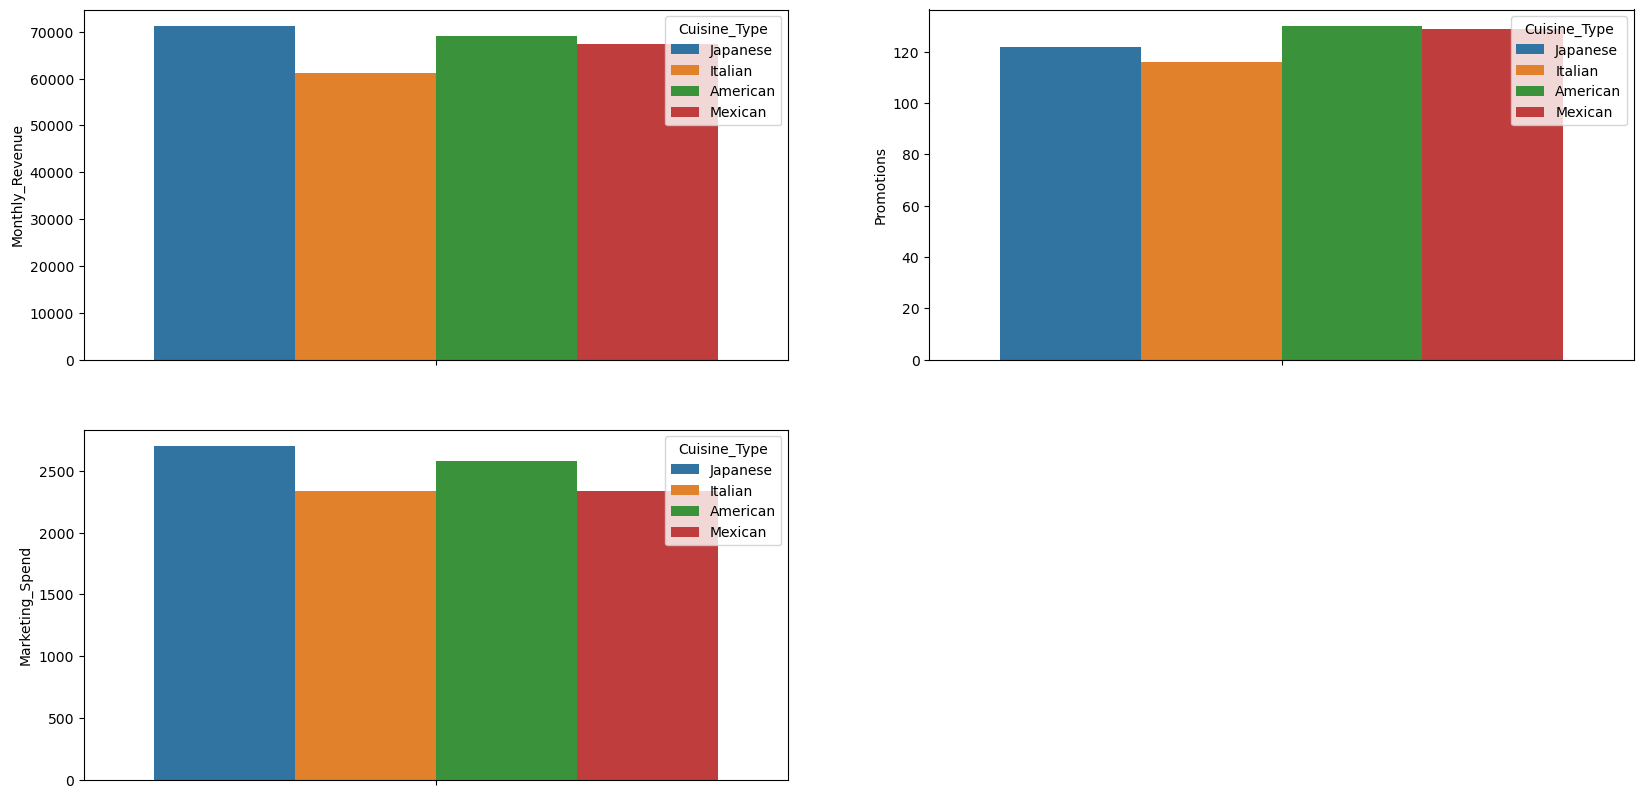

In [8]:
plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
sns.barplot(data = df, y = 'Monthly_Revenue', hue = 'Cuisine_Type', estimator = sum, errorbar = None)
plt.subplot(2, 2, 2)
sns.barplot(data = df, y = 'Promotions', hue = 'Cuisine_Type', estimator = sum, errorbar = None)
plt.subplot(2, 2, 3)
sns.barplot(data = df, y = 'Marketing_Spend', hue = 'Cuisine_Type', estimator = sum, errorbar = None)

## data cleansing

In [9]:
def tipe_masakan(x):
    if x == 'Japanese':
        return 1
    elif x == 'American':
        return 2
    elif x == 'Mexican':
        return 3
    else:
        return 4

In [10]:
df['Tipe_Masakan'] = df['Cuisine_Type'].apply(tipe_masakan)

In [11]:
df.head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Tipe_Masakan
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040,1
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091,4
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763,1


In [12]:
df.drop('Cuisine_Type', axis = 1, inplace = True)
df.head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Tipe_Masakan
0,61,43.117635,12.663793,36.236133,0,45,350.912040,1
1,24,40.020077,4.577892,17.952562,0,36,221.319091,4
2,81,41.981485,4.652911,22.600420,1,91,326.529763,1


In [13]:
x = df.drop('Monthly_Revenue', axis = 1)
y = df['Monthly_Revenue']

x.shape, y.shape

((1000, 7), (1000,))

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 7)

In [15]:
x_train.head(2)

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Tipe_Masakan
629,72,33.908943,14.819625,44.742281,1,22,2
288,63,33.530550,6.303790,31.386437,1,3,2


In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
scaler.fit(x_train.to_numpy())
x_train_scaled = scaler.transform(x_train.to_numpy())
x_train_scaled = pd.DataFrame(x_train_scaled, columns = [
    'Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'Tipe_Masakan'])

print(f'dataset yang sudah discaling Standard Scaler')
x_train_scaled.head(2)

dataset yang sudah discaling Standard Scaler


,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Tipe_Masakan
0,0.696629,0.598655,0.744060,0.870454,1.0,0.214286,0.333333
1,0.595506,0.589163,0.314807,0.533190,1.0,0.020408,0.333333


In [17]:
scaler2 = StandardScaler()
y_train = y_train.values.reshape(-1, 1)
scaler2.fit(y_train)
y_train_scaled = scaler2.transform(y_train)
y_train_scaled = pd.DataFrame(y_train_scaled, columns = ['Monthly_Revenue'])

print(f'dataset yang sudah discaling Standard Scaler')
y_train_scaled.head(2)

dataset yang sudah discaling Standard Scaler


,Monthly_Revenue
0,0.928241
1,0.427804


## modelling

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Membuat fungsi untuk running beberapa model
from sklearn.model_selection import cross_val_score

def crossValModel(nama_model, x, y):
    nama_model = nama_model
    nama_model.fit(x, y)
    print(f'Cross validation skor: {cross_val_score(nama_model, x, y)}')

In [20]:
# Melihat cross-val-score dari beberapa model

print('Linear Regression')
crossValModel(LinearRegression(), x_train_scaled, y_train_scaled)
print('\nLasso')
crossValModel(Lasso(), x_train_scaled, y_train_scaled)
print('\nLasso CV')
crossValModel(LassoCV(), x_train_scaled, y_train_scaled)
print('\nBayesian Ridge')
crossValModel(BayesianRidge(), x_train_scaled, y_train_scaled)
print('\nElastic Net')
crossValModel(ElasticNet(), x_train_scaled, y_train_scaled)
print('\nElastic Net CV')
crossValModel(ElasticNetCV(), x_train_scaled, y_train_scaled)
print('\nDecision Tree Regressor')
crossValModel(DecisionTreeRegressor(), x_train_scaled, y_train_scaled)
print('\nSVR')
crossValModel(SVR(max_iter = 3000), x_train_scaled, y_train_scaled)
print('\nGradient Boosting Regressor')
crossValModel(GradientBoostingRegressor(), x_train_scaled, y_train_scaled)
print('\nRandom Forest Regressor')
crossValModel(RandomForestRegressor(), x_train_scaled, y_train_scaled)

Linear Regression
Cross validation skor: [0.71548466 0.76271221 0.62481798 0.41114829 0.75793497]

Lasso
Cross validation skor: [-1.21433004e-02 -7.18266710e-05 -5.72621454e-02 -6.76628679e-02
 -7.60455510e-03]

Lasso CV
Cross validation skor: [0.72657142 0.76173409 0.63377066 0.41200232 0.74862851]

Bayesian Ridge
Cross validation skor: [0.71938128 0.76103286 0.62695491 0.41383338 0.75467213]

Elastic Net
Cross validation skor: [-1.21433004e-02 -7.18266710e-05 -5.72621454e-02 -6.76628679e-02
 -7.60455510e-03]

Elastic Net CV
Cross validation skor: [0.72639688 0.7601498  0.62901219 0.41564436 0.74831223]

Decision Tree Regressor
Cross validation skor: [-0.02278492  0.49897222  0.42884404 -0.0538501   0.42563465]

SVR
Cross validation skor: [0.5753383  0.69554378 0.68666837 0.40150983 0.67853962]

Gradient Boosting Regressor
Cross validation skor: [0.57077535 0.61866436 0.54773597 0.36649056 0.68299452]

Random Forest Regressor
Cross validation skor: [0.61751297 0.6786391  0.64633553 0.

In [21]:
model = LassoCV()
model.fit(x_train_scaled, y_train_scaled)

LassoCV()

In [22]:
x_test_scaled = scaler.transform(x_test.to_numpy())
x_test_scaled = pd.DataFrame(x_test_scaled, columns = [
    'Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'Tipe_Masakan'])

print(f'dataset yang sudah discaling Standard Scaler')
x_test_scaled.head(2)

dataset yang sudah discaling Standard Scaler


,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Tipe_Masakan
0,0.325843,0.148380,1.001275,0.727345,1.0,0.928571,0.666667
1,0.404494,0.271497,0.790422,0.837994,0.0,0.459184,0.000000


In [23]:
y_test = y_test.values.reshape(-1, 1)
scaler2.fit(y_test)
y_test_scaled = scaler2.transform(y_test)
y_test_scaled = pd.DataFrame(y_test_scaled, columns = ['Monthly_Revenue'])

print(f'dataset yang sudah discaling Standard Scaler')
y_test_scaled.head(2)

dataset yang sudah discaling Standard Scaler


,Monthly_Revenue
0,1.064667
1,0.180354


In [24]:
y_pred = model.predict(x_test_scaled)

## evaluation

In [25]:
# Error & R2 Score

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_test_scaled, y_pred)
MAE = mean_absolute_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

print(f'MSE : {MSE}\nMAE : {MAE}\nR2 Score : {r2}')

MSE : 0.33035350727865975
MAE : 0.4572747945648812
R2 Score : 0.6696464927213401


In [26]:
y_test_scaled = y_test_scaled.values.reshape(-1, 1)

In [27]:
indeks = 214

In [28]:
scaler2.inverse_transform([y_test_scaled[indeks]])

array([[340.62671779]])

In [29]:
scaler2.inverse_transform([[y_pred[indeks]]])

array([[422.51842345]])

In [30]:
x_test.iloc[[indeks]]

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Tipe_Masakan
179,86,46.42496,14.99091,33.113119,1,0,2


In [31]:
# Shap (Modul untuk interpret model)

import shap

explainer = shap.Explainer(
    model, x_train_scaled, feature_names = [
    'Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'Tipe_Masakan'])
shap_values = explainer(x_test_scaled)

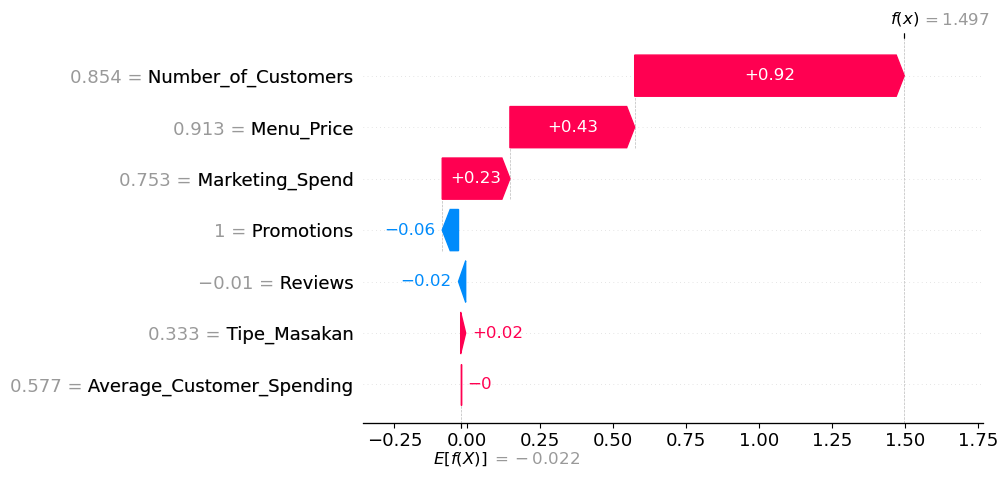

In [34]:
shap.plots.waterfall(shap_values[indeks])